In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('PS4_GamesSales.csv', sep=',', encoding='latin-1')
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Verificar a dimensão da tabela
dados.shape

(1034, 9)

In [4]:
# Verificar o tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [5]:
# Renomear colunas
dados.rename(columns={
    'Game':'Jogos',
    'Genre':'Gênero',
    'Publisher':'Publicação',
    'North America':'America do Norte',
    'Europe':'Europa',
    'Japan':'Japão',
    'Rest of World':'Resto do Mundo',
    'Global':'Geral'    
    
}, inplace=True)

dados.head()

,Jogos,Year,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
# Verificar campos nulos
dados['Publicação'].isnull().sum()


209

In [7]:
dados.rename(columns={
    'Game':'Jogos',
    'Year':'Ano',
    'Genre':'Gênero',
    'Publisher':'Publicação',
    'North America':'America do Norte',
    'Europe':'Europa',
    'Japan':'Japão',
    'Rest of World':'Resto do Mundo',
    'Global':'Geral'    
    
}, inplace=True)

dados.head()


,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [8]:
# Preencher vazios com valor anterior ou posterior
dados['Ano'] = dados['Ano'].fillna(method='bfill')
dados.head()

,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


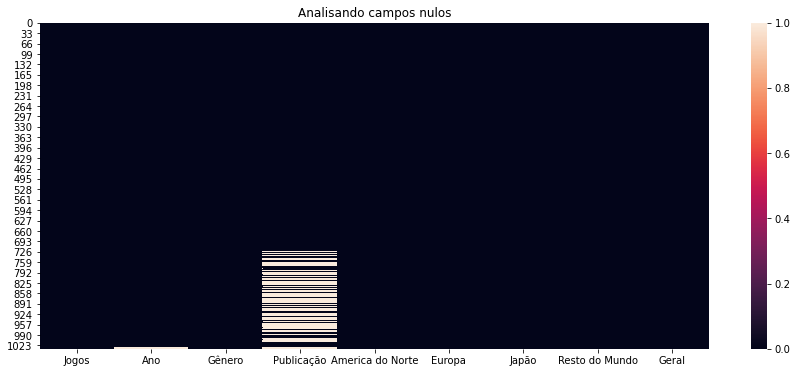

In [9]:
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos')
sns.heatmap(dados.isnull());

In [10]:
dados.isnull().sum()

Jogos                 0
Ano                   3
Gênero                0
Publicação          209
America do Norte      0
Europa                0
Japão                 0
Resto do Mundo        0
Geral                 0
dtype: int64

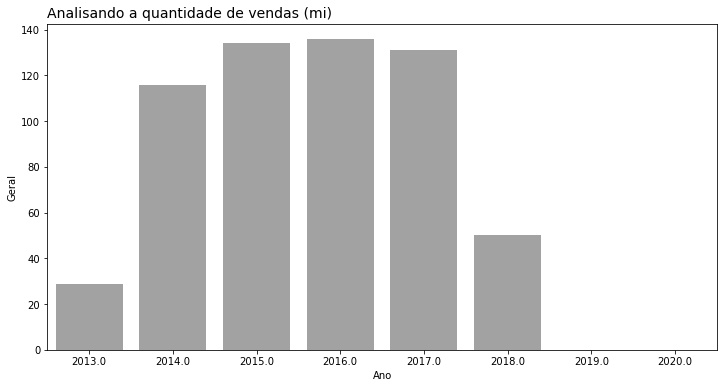

In [11]:
# Análise de vendas utilizando o barplot
plt.figure(figsize=(12,6))
plt.title('Analisando a quantidade de vendas (mi)', loc='left', fontsize=14)
plt.style.use('ggplot')

sns.barplot(data=dados, x='Ano', y='Geral', ci=None, color='#a2a2a2', estimator=sum);





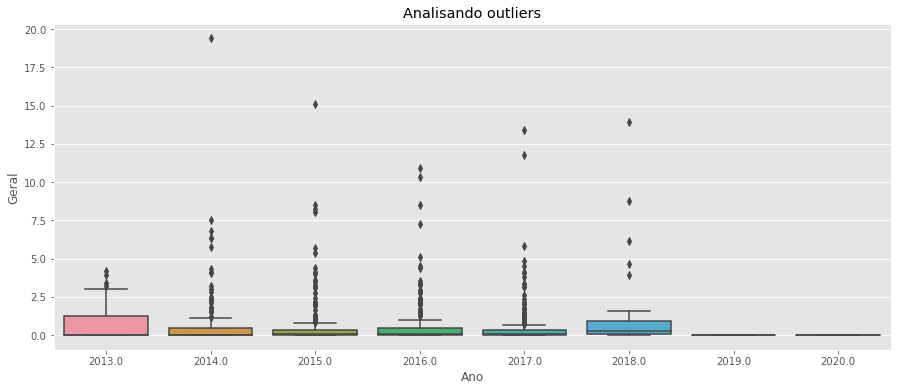

In [12]:
# Verificar outliers através de boxplot

plt.figure(figsize=(15,6))
plt.title('Analisando outliers')

sns.boxplot(data=dados, x='Ano', y='Geral');

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jogos             1034 non-null   object 
 1   Ano               1031 non-null   float64
 2   Gênero            1034 non-null   object 
 3   Publicação        825 non-null    object 
 4   America do Norte  1034 non-null   float64
 5   Europa            1034 non-null   float64
 6   Japão             1034 non-null   float64
 7   Resto do Mundo    1034 non-null   float64
 8   Geral             1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [14]:
# Mostra os jogos que venderam mais que 10 milhões
dados.loc[ dados['Geral'] >= 10]

,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [15]:
analise = dados.groupby(by=dados['Ano']).sum()
analise.head()

,America do Norte,Europa,Japão,Resto do Mundo,Geral
Ano,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.29,7.28,20.89,134.09
2016.0,47.40,57.98,9.74,20.71,135.81
2017.0,44.77,57.20,9.08,19.89,130.93


In [16]:
# Removendo colunas com valores zerados
analise = analise.loc[(analise['America do Norte'] > 0)
                     & (analise['Europa'] > 0)
                     & (analise['Japão'] > 0)
                     & (analise['Resto do Mundo'] > 0)
                     & (analise['Geral'] > 0)]

In [17]:
# Calcular a porcetagem de venda do continente especifico pelo total.
America = [America / Total * 100 for America, Total in zip( analise['America do Norte'], analise['Geral'])]
Europa = [Europa / Total * 100 for Europa, Total in zip( analise['Europa'], analise['Geral'])]
Japão = [Japão / Total * 100 for Japão, Total in zip( analise['Japão'], analise['Geral'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip( analise['Resto do Mundo'], analise['Geral'])]

America, Europa, Japão, Mundo



([35.9874826147427,
  34.35476909797151,
  36.990081288686696,
  34.90170090567699,
  34.19384403879944,
  39.14342629482069],
 [44.78442280945758,
  46.715580492015526,
  41.9792676560519,
  42.691996171121374,
  43.68746658519822,
  37.250996015936266],
 [3.3727399165507648,
  3.090202848511003,
  5.429189350436273,
  7.171784110153867,
  6.935003436951035,
  8.22709163346613],
 [15.890125173852573,
  15.787656452309026,
  15.579088671787634,
  15.249245269126014,
  15.191323608034915,
  15.318725099601588])

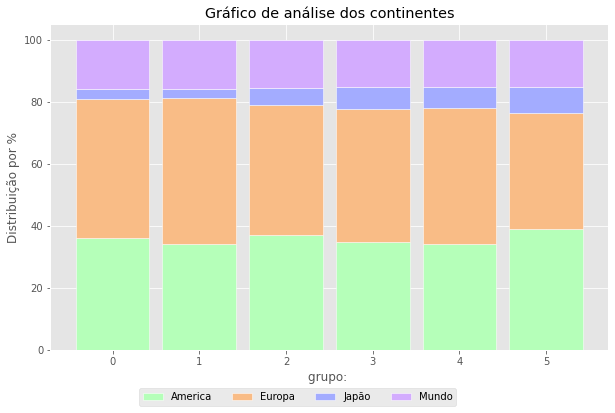

In [18]:
# gráfico de plotagem

#Tamanho
plt.figure(figsize=(10,6))

#Title
plt.title("Gráfico de análise dos continentes")


#Largura barra no gráfico
largura_barra = 0.85
rotulos = dados['Ano']
grupos = [0, 1, 2, 3, 4, 5]

#plot da America
plt.bar(grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white')

#plot da Europa
plt.bar(grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')

#plot do Japão
plt.bar(grupos, Japão, bottom=[A + B for A, B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')

#plot resto do mundo
plt.bar(grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japão)], width=largura_barra, color='#d3acfe', edgecolor='white')


#labels
plt.xlabel('grupo: ')
plt.ylabel('Distribuição por %')

#legenda
plt.legend(['America', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);


In [19]:
# Vericar o total de empresas que publicaram jogos
dados['Publicação'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [20]:
#conda install -c anaconda scikit-learn

In [23]:
# Atribuir identificação numerica para empresas que publicaram jogos
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

dados['Produtor'] = funcao_label.fit_transform(dados['Publicação'])

dados.head()

,Jogos,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral,Produtor
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,109
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,109
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,41


In [24]:
# paleta de cores do seaborn

paleta = sns.color_palette('Dark2', 15)

paleta

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

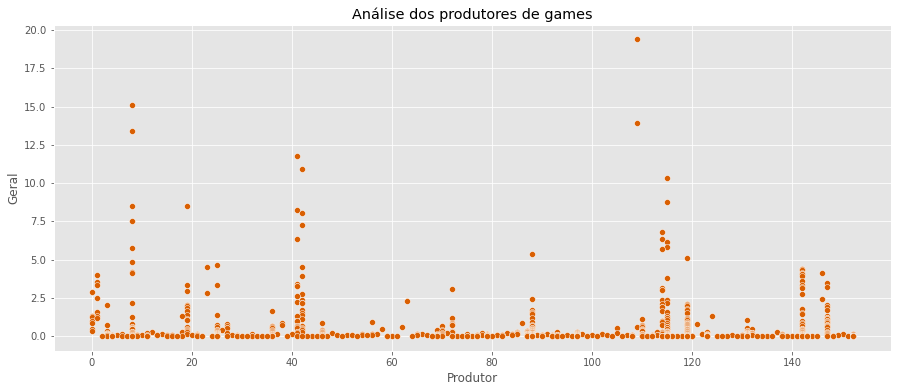

In [26]:
plt.figure(figsize=(15,6))
plt.title('Análise dos produtores de games')
sns.scatterplot(data=dados, x = 'Produtor', y='Geral', color=paleta[1]);
